### 1. Загрузити файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame.

### 2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), переконайтеся, що це відображається як значення np.NaN.

In [1]:
import pandas as pd
import numpy as np

energy_data = pd.read_excel(
    'data/En_In.xls', 
    skiprows=17, 
    skipfooter=38, 
    usecols=[2, 3, 4, 5], 
    names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
)
energy_data.replace('...', np.nan, inplace=True)
energy_data['Energy Supply'] *= 1e6
energy_data.head()

C:\Users\mihas\AppData\Local\Temp\ipykernel_9532\1428079648.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy_data.replace('...', np.nan, inplace=True)


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


### 3. Перейменуйте наступний список країн:
#### 1. "Republic of Korea": "South Korea",
#### 2. "United States of America": "United States", "
#### 3. United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
#### 4. "China, Hong Kong Special Administrative Region": "Hong Kong"

### 4. Існує також декілька країн, що мають в назві цифри та/або дужки. Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)' повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

In [2]:
energy_data['Country'] = energy_data['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})
energy_data['Country'] = energy_data['Country'].str.replace(r" \(.+\)", "", regex=True)
energy_data['Country'] = energy_data['Country'].str.replace(r"\d+", "", regex=True)
energy_data.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


### 5. Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року. Обов’язково не включайте заголовок до датафрейму і перейменуйте наступний список країн:
#### - "Korea, Rep.": "South Korea",
#### - "Iran, Islamic Rep.": "Iran",
#### - "Hong Kong SAR, China": "Hong Kong"

In [3]:
gdp_data = pd.read_csv('data/gpd.csv', skiprows=4)
gdp_data['Country Name'] = gdp_data['Country Name'].replace({
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
})
gdp_data = gdp_data[['Country Name'] + [str(year) for year in range(2006, 2016)]]
gdp_data.head()

,Country Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


### 6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі їхніх публікацій в журналах у галузі енергетичного машинобудування та енергетичних технологій.

In [4]:
scimago_data = pd.read_excel('data/scimagojr.xlsx')
scimago_data.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


### 7. Приєднайте три набори даних із завдань 1-6 до нового набору даних (використовуючи перетин назв країн). - Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15) - Індексом цього DataFrame повинна бути назва країни, а стовпцями мають бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']. Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [5]:
merged_data = scimago_data.merge(energy_data, on='Country').merge(gdp_data, left_on='Country', right_on='Country Name')
merged_data = merged_data[merged_data['Rank'] <= 15]
merged_data.set_index('Country', inplace=True)
merged_data.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.94543,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.90153,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12


### 8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.

In [6]:
avg_gdp = merged_data[[str(year) for year in range(2006, 2016)]].mean(axis=1).sort_values(ascending=False)
avg_gdp


Country
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

### 9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.

In [7]:
target_country = avg_gdp.index[4]
gdp_change = merged_data.loc[target_country, '2015'] - merged_data.loc[target_country, '2006']
target_country, gdp_change

('Brazil', 474343725980.5698)

### 10. Створіть функцію, щоб визначити, в якій країні встановлено максимум поновлюваних джерел енергії (% Renewable) та який саме відсоток.

In [8]:
renewable_country = merged_data['% Renewable'].idxmax()
max_renewable = merged_data['% Renewable'].max()
renewable_country, max_renewable

('Brazil', 69.64803)

### 11. Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою?

In [9]:
merged_data['Estimated Population'] = merged_data['Energy Supply'] / merged_data['Energy Supply per Capita']
fifth_pop_country = merged_data['Estimated Population'].nlargest(5).index[-1]
fifth_population = merged_data.loc[fifth_pop_country, 'Estimated Population']
fifth_pop_country, fifth_population

('Japan', 127409395.97315437)

### 12. Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона).

In [10]:
supply_citation_corr = merged_data['Energy Supply per Capita'].corr(merged_data['Citations'])
supply_citation_corr

-0.11416727843581774

### 13. Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани.

In [11]:
renewable_median = merged_data['% Renewable'].median()
merged_data['Above Median Renewable'] = (merged_data['% Renewable'] >= renewable_median).astype(int)
merged_data['Above Median Renewable'].sort_index()

Country
Australia             0
Brazil                1
Canada                1
China                 1
France                0
Germany               1
India                 0
Iran                  0
Italy                 1
Japan                 0
Russian Federation    1
South Korea           0
Spain                 1
Name: Above Median Renewable, dtype: int32

### 14. Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.

ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America', 'Germany':'Europe', 'India':'Asia', 'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe', 'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'}

In [12]:
continent_map = {
    'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia',
    'United Kingdom': 'Europe', 'Russian Federation': 'Europe',
    'Canada': 'North America', 'Germany': 'Europe', 'India': 'Asia',
    'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe',
    'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia',
    'Brazil': 'South America'
}
merged_data['Continent'] = merged_data.index.map(continent_map)
merged_data.groupby('Continent')['Estimated Population'].agg(['size', 'sum', 'mean', 'std'])


,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,5,3.940587e+08,7.881174e+07,3.813228e+07
North America,1,3.523986e+07,3.523986e+07,NaN
South America,1,2.059153e+08,2.059153e+08,NaN


### 15. Створіть бульбашкову діаграму, що відображає залежність % поновлюваних джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки відповідає ВВП країн 2015 року, а колір відповідає континенту.

C:\Users\mihas\AppData\Local\Temp\ipykernel_9532\1765475407.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged_data['Rank'][idx],
C:\Users\mihas\AppData\Local\Temp\ipykernel_9532\1765475407.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged_data['% Renewable'][idx],


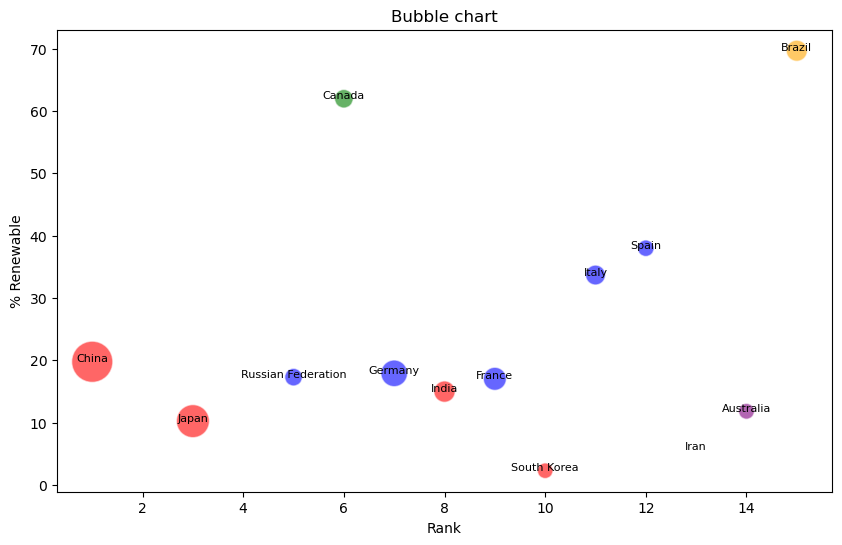

In [20]:
import matplotlib.pyplot as plt

continent_colors = {
    'Asia': 'red', 
    'Europe': 'blue', 
    'North America': 'green', 
    'Australia': 'purple', 
    'South America': 'orange'
}

plt.figure(figsize=(10, 6))
plt.scatter(
    merged_data['Rank'], 
    merged_data['% Renewable'], 
    s=merged_data['2015'] / 1e10, 
    c=merged_data['Continent'].map(continent_colors), 
    alpha=0.6, 
    edgecolors='w'
)

for idx, country in enumerate(merged_data.index):
    plt.text(
        merged_data['Rank'][idx], 
        merged_data['% Renewable'][idx], 
        country, 
        fontsize=8, 
        ha='center'
    )

plt.title('Bubble chart')
plt.xlabel('Rank')
plt.ylabel('% Renewable')
plt.savefig('bubble_chart.png', dpi=300)
plt.show()